# Project of Python Course
#### Koc University, Istanbul, Turkey
#### Author: Amir Ranjouriheravi
#### May 2020

## Loading the necessary libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from math import sqrt, log, ceil
import lightgbm as lgb
import matplotlib.pyplot as plt
%matplotlib inline
try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple
    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

## Data preprocessing

In [4]:
df = pd.read_csv('owid-covid-data.csv')
df = df.dropna(axis=0)
df = df[df['total_cases'] != 0]
y = df['total_deaths']/df['total_cases']
df = df.drop(columns=['iso_code', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',\
        'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million',\
        'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units'])
df = df.drop_duplicates(keep = 'last')
X = df

## Train-test split and LightGBM Objects

In [5]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size = 0.20, random_state = 123)
lgb_train = lgb.Dataset(Xtr, ytr)
lgb_test = lgb.Dataset(Xts, yts, reference=lgb_train)

## Training

In [ ]:
params = {
    'num_leaves': 100,
    'metric': ['l1', 'l2'],
    'verbose': -1
}
evals_result = {}  # to record eval results for plotting
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=[lgb_train, lgb_test],
                evals_result=evals_result,
                verbose_eval=10)
rgs = lgb.LGBMRegressor()
rgs.fit(Xtr, ytr)

## Training accuracy

In [ ]:
train_accuracy = rgs.score(Xtr, ytr)
test_accuracy = rgs.score(Xts, yts)
print ('The train accuracy and test accuracy are ',\
       '{:.1%}'.format(train_accuracy),' and ',\
       '{:.1%}'.format(test_accuracy), 'respectively.')
ypred = gbm.predict(Xts)
print(ypred)

## Plot metrics

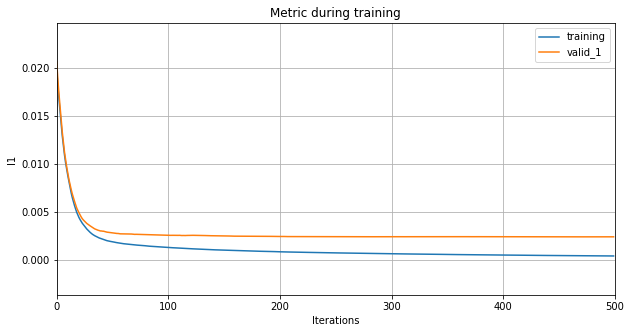

In [8]:
def render_metric(metric_name):
    ax = lgb.plot_metric(evals_result, metric=metric_name, figsize=(10, 5))
    plt.show()
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name=params['metric'])
else:
    render_metric(params['metric'][0])

## Plot feature importances

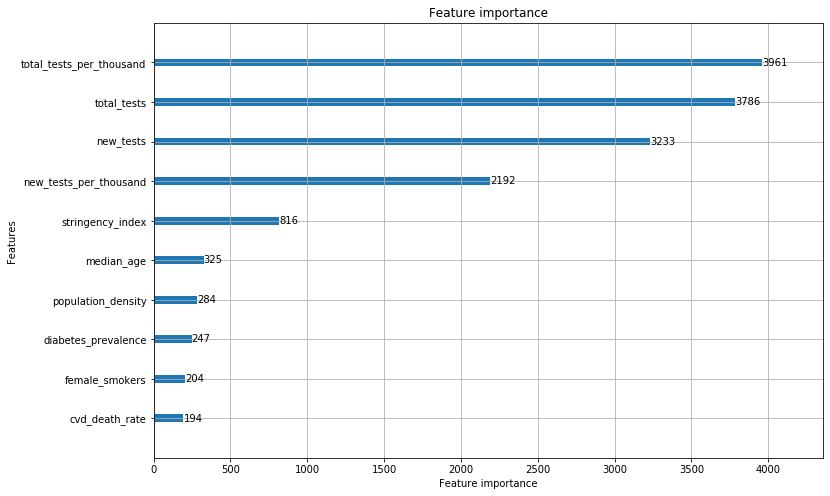

In [9]:
def render_plot_importance(importance_type, max_features=10,
                           ignore_zero=True, precision=3):
    ax = lgb.plot_importance(gbm, importance_type=importance_type,
                             max_num_features=max_features,
                             ignore_zero=ignore_zero, figsize=(12, 8),
                             precision=precision)
    plt.show()
if INTERACTIVE:
    # create widget for interactive feature importance plot
    interact(render_plot_importance,
             importance_type=['split', 'gain'],
             precision=(0, 10))
else:
    render_plot_importance(importance_type='split')